In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("messy_customer_data.csv")

In [4]:
df.head()

,Customer_ID,Name,Age,Join_Date,City,Annual_Income,Spending_Score
0,CUST_1000,User_0,56.0,2020-01-05,Los Angeles,"$51,971.30",97
1,CUST_1001,User_1,69.0,2020-01-12,Houston,45146.193795563755,69
2,CUST_1002,User_2,46.0,2020-01-19,Houston,"$49,688.78",61
3,CUST_1003,User_3,32.0,2020-01-26,new york,"$80,229.18",48
4,CUST_1004,User_4,NaN,2020-02-02,miami,66345.25539522368,19


In [5]:
df["Annual_Income"] = df["Annual_Income"].str.replace("$", "")

In [6]:
df.head()

,Customer_ID,Name,Age,Join_Date,City,Annual_Income,Spending_Score
0,CUST_1000,User_0,56.0,2020-01-05,Los Angeles,"51,971.30",97
1,CUST_1001,User_1,69.0,2020-01-12,Houston,45146.193795563755,69
2,CUST_1002,User_2,46.0,2020-01-19,Houston,"49,688.78",61
3,CUST_1003,User_3,32.0,2020-01-26,new york,"80,229.18",48
4,CUST_1004,User_4,NaN,2020-02-02,miami,66345.25539522368,19


In [7]:
df["Age"] = df["Age"].fillna(df["Age"].median())

In [8]:
df["Age"] = df["Age"].astype("int32")

In [9]:
df = df.drop_duplicates(subset=["Customer_ID", "Name"])

In [10]:
df.shape

(100, 7)

In [11]:
df["Annual_Income"] = df["Annual_Income"].str.replace(",", "")

In [12]:
df["Annual_Income"] = df["Annual_Income"].astype("float64")

In [13]:
df["Annual_Income"].dtype

dtype('float64')

In [14]:
df["Annual_Income"] = df["Annual_Income"].round(decimals=2)

In [15]:
df['City'] = df['City'].str.title().str.strip()

In [16]:
df["Age"].describe()

count    100.000000
mean      51.420000
std       24.617141
min      -25.000000
25%       36.500000
50%       53.000000
75%       67.000000
max      200.000000
Name: Age, dtype: float64

In [17]:
df.loc[(df["Age"] < 18) | (df["Age"] > 100)] = df["Age"].median()

In [18]:
df["Age"].describe()

count    100.000000
mean      50.730000
std       17.988692
min       19.000000
25%       37.750000
50%       53.000000
75%       66.250000
max       79.000000
Name: Age, dtype: float64

In [19]:
df.dropna(subset=["Name"], inplace=True)

In [20]:
df["Spending_Score"].describe()

count     95.000000
mean      52.842105
std       30.240284
min      -10.000000
25%       25.500000
50%       53.000000
75%       69.500000
max      150.000000
Name: Spending_Score, dtype: float64

In [21]:
df["Spending_Score"] = df["Spending_Score"].clip(lower=0, upper=100)

In [22]:
df.head()

,Customer_ID,Name,Age,Join_Date,City,Annual_Income,Spending_Score
0,CUST_1000,User_0,56,2020-01-05,Los Angeles,51971.30,97
1,CUST_1001,User_1,69,2020-01-12,Houston,45146.19,69
2,CUST_1002,User_2,46,2020-01-19,Houston,49688.78,61
3,CUST_1003,User_3,32,2020-01-26,New York,80229.18,48
4,CUST_1004,User_4,53,2020-02-02,Miami,66345.26,19


In [23]:
df = df[df['Name'] != 53.0]

In [24]:
city_avg = df.groupby(["City"])["Annual_Income"].mean()

In [25]:
city_avg

City
Chicago        85233.971053
Houston        76322.402105
Los Angeles    76706.579231
Miami          81864.696842
New York       77727.424783
Name: Annual_Income, dtype: float64

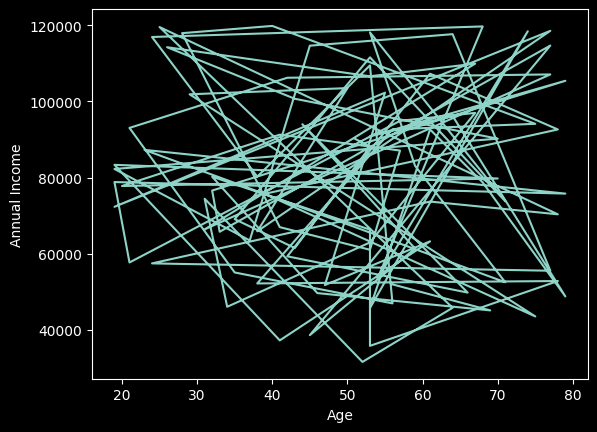

In [28]:
plt.plot(df["Age"], df["Annual_Income"])
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.show()

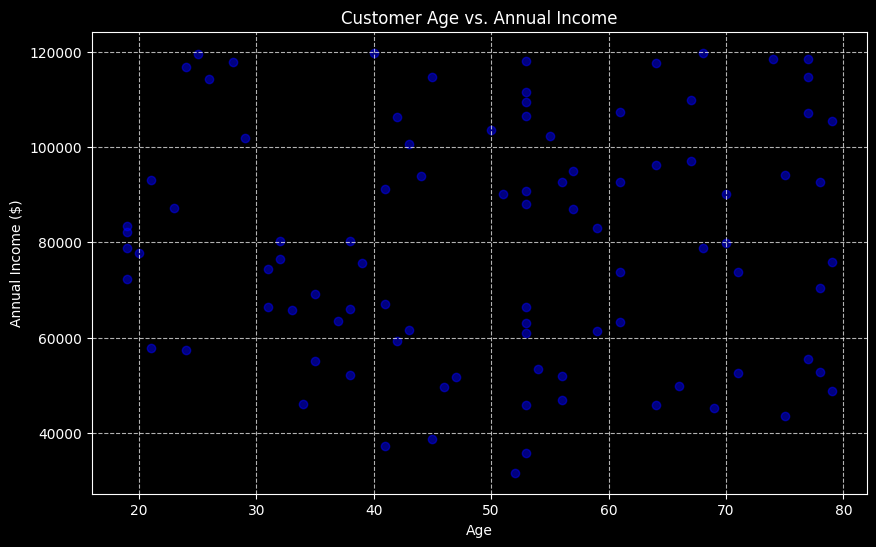

In [29]:
plt.figure(figsize=(10, 6)) # Make the chart bigger

# Use 'o' for dots, or just use plt.scatter
plt.scatter(df["Age"], df["Annual_Income"], color='blue', alpha=0.5)

plt.xlabel("Age")
plt.ylabel("Annual Income ($)")
plt.title("Customer Age vs. Annual Income")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()